<a href="https://colab.research.google.com/github/ryanbat360/CPTS440/blob/main/ai_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import os.path

In [11]:
currentsize = os.path.getsize('./FPA_FOD_20170508.sqlite')/1024/1024
if(758.919921875 == 758.919921875):
  print('758.919921875 downloaded successfully')
else:
  print('download in prgress: current size'+currentsize)

758.919921875 downloaded successfully


In [12]:
pip install geodatasets

In [13]:
pip install pycountry

In [14]:
import geopandas
import geodatasets
import matplotlib.pyplot as plt
from geodatasets import get_path
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.0f}'.format
import pycountry
import seaborn as sns
import sqlite3
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import *
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
import xgboost as xgb
from sklearn.metrics import precision_score, recall_score, f1_score

In [15]:
con = sqlite3.connect("./FPA_FOD_20170508.sqlite")


In [16]:
world_file = geopandas.datasets.get_path('naturalearth_lowres')
world = geopandas.read_file(world_file)

<ipython-input-16-f7932d166ad7>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_file = geopandas.datasets.get_path('naturalearth_lowres')


In [17]:
#### Code to check if the database file loaded correctly, all the tables ###
#### closes the connection so redo connection ###
try:


    # Getting all tables from sqlite_master
    sql_query = """SELECT name FROM sqlite_master
    WHERE type='table';"""

    # Creating cursor object using connection object
    cursor = con.cursor()

    # executing our sql query
    cursor.execute(sql_query)
    print("List of tables\n")

    # printing all tables list
    print(cursor.fetchall())

except sqlite3.Error as error:
    print("Failed to execute the above query", error)

finally:

    # Inside Finally Block, If connection is
    # open, we need to close it
    if con:

        # using close() method, we will close
        # the connection
        con.close()

        # After closing connection object, we
        # will print "the sqlite connection is
        # closed"
        print("the sqlite connection is closed")

List of tables

[('spatial_ref_sys',), ('spatialite_history',), ('sqlite_sequence',), ('geometry_columns',), ('spatial_ref_sys_aux',), ('views_geometry_columns',), ('virts_geometry_columns',), ('geometry_columns_statistics',), ('views_geometry_columns_statistics',), ('virts_geometry_columns_statistics',), ('geometry_columns_field_infos',), ('views_geometry_columns_field_infos',), ('virts_geometry_columns_field_infos',), ('geometry_columns_time',), ('geometry_columns_auth',), ('views_geometry_columns_auth',), ('virts_geometry_columns_auth',), ('sql_statements_log',), ('SpatialIndex',), ('ElementaryGeometries',), ('KNN',), ('Fires',), ('idx_Fires_Shape',), ('idx_Fires_Shape_node',), ('idx_Fires_Shape_rowid',), ('idx_Fires_Shape_parent',), ('NWCG_UnitIDActive_20170109',)]
the sqlite connection is closed


In [18]:
con = sqlite3.connect("./FPA_FOD_20170508.sqlite")

In [19]:
fires = pd.read_sql_query("SELECT * from Fires", con)

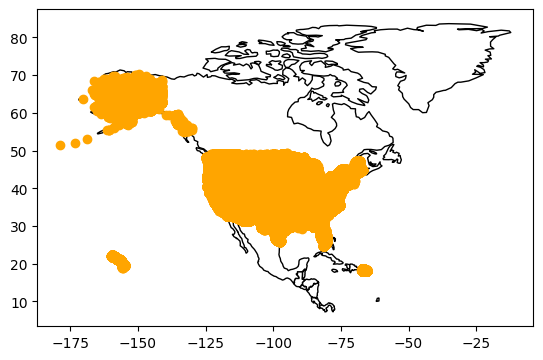

In [20]:
gdf = geopandas.GeoDataFrame(
    fires, geometry=geopandas.points_from_xy(fires.LONGITUDE, fires.LATITUDE), crs="EPSG:4326"
)
north_america = world[world["continent"] == "North America"]
##plotting the points of the fires to North America
ax = north_america.plot(color="white", edgecolor="black")
gdf.plot(ax=ax, color="orange")

plt.show()

In [21]:
filtered_df_fires = fires[fires["FIRE_SIZE_CLASS"].str.contains("G")]

In [22]:
gdf_filtered = geopandas.GeoDataFrame(
    filtered_df_fires, geometry=geopandas.points_from_xy(filtered_df_fires.LONGITUDE, filtered_df_fires.LATITUDE), crs="EPSG:4326"
)

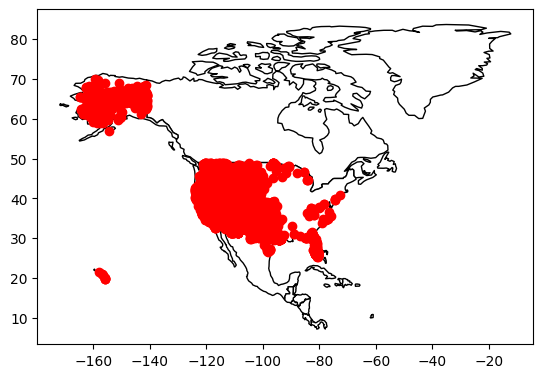

In [23]:
ax = north_america.plot(color="white", edgecolor="black")

##plotting fire greater than 5000 acres
gdf_filtered.plot(ax=ax, color="red")

plt.show()

In [24]:
count_by_state = fires['STATE'].value_counts()

In [25]:
count_by_state.head(5)

STATE
CA    189550
GA    168867
TX    142021
NC    111277
FL     90261
Name: count, dtype: int64

In [26]:
count_by_county = fires['COUNTY'].value_counts()

In [27]:
count_by_county.head(5)

COUNTY
5             7576
Lincoln       7405
SUFFOLK       7373
Polk          6955
Washington    6916
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

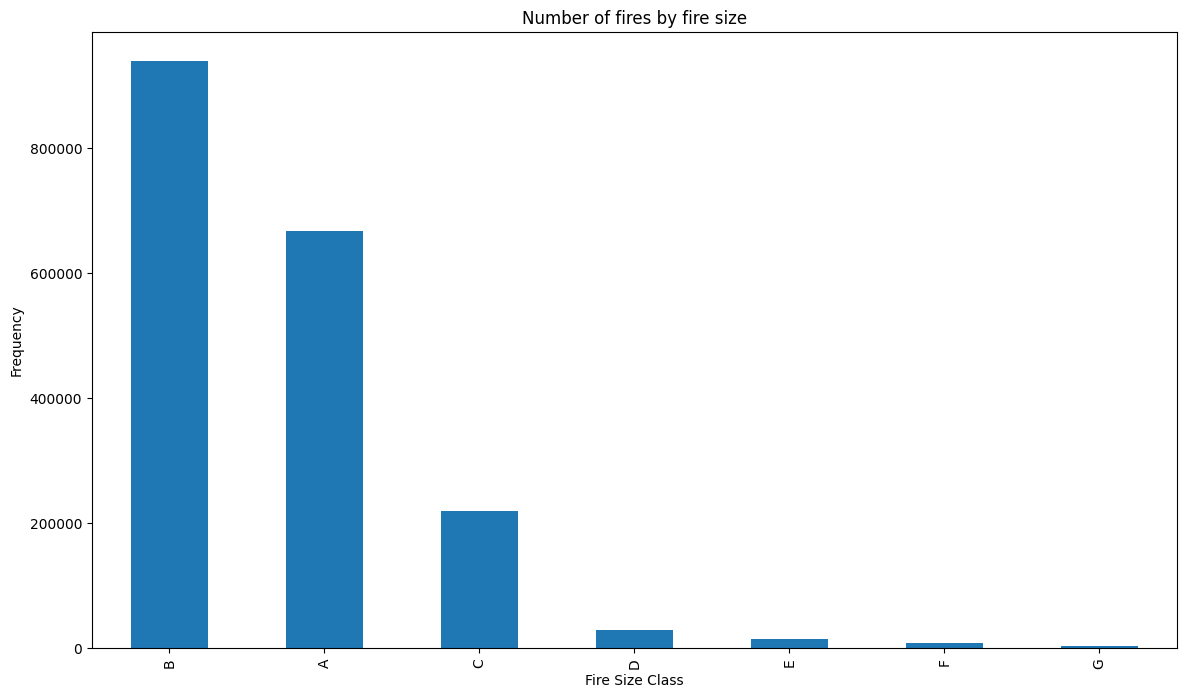

In [28]:
ax2 = fires['FIRE_SIZE_CLASS'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of fires by fire size")
ax2.set_xlabel("Fire Size Class")
ax2.set_ylabel("Frequency")

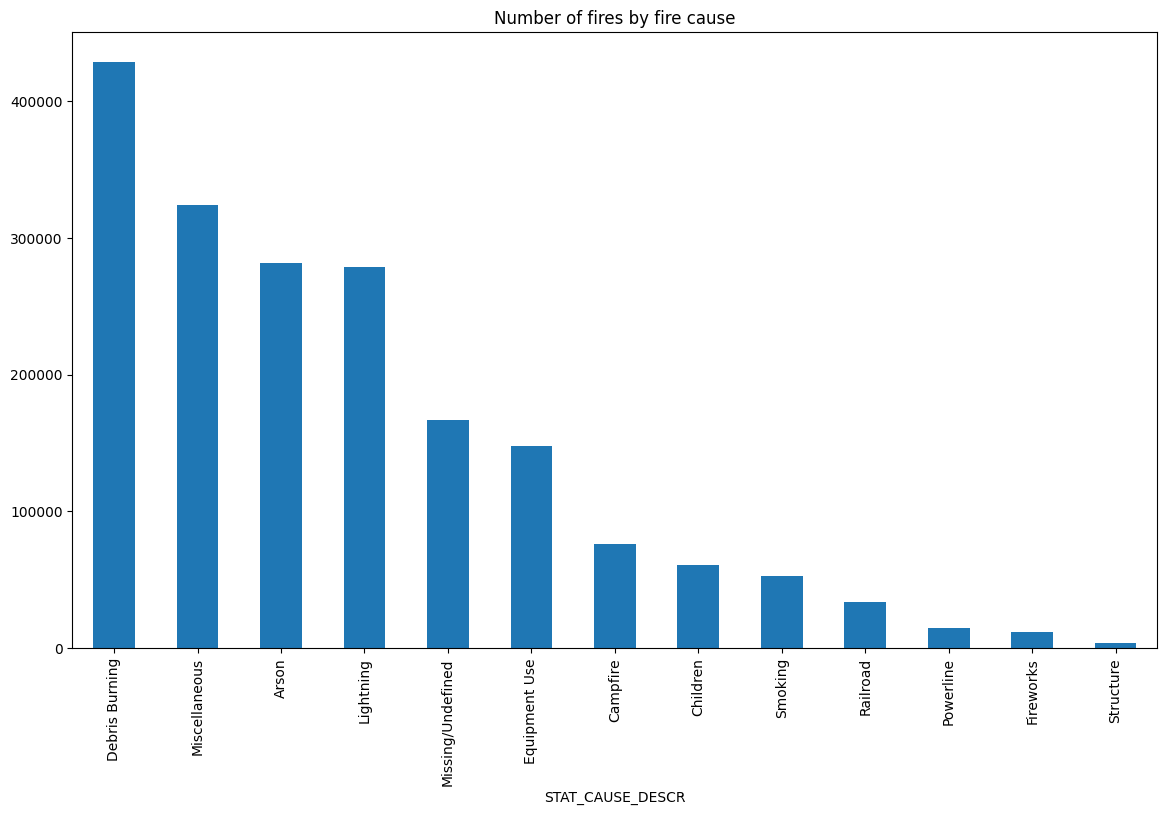

In [29]:
ax3 = fires['STAT_CAUSE_DESCR'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of fires by fire cause")


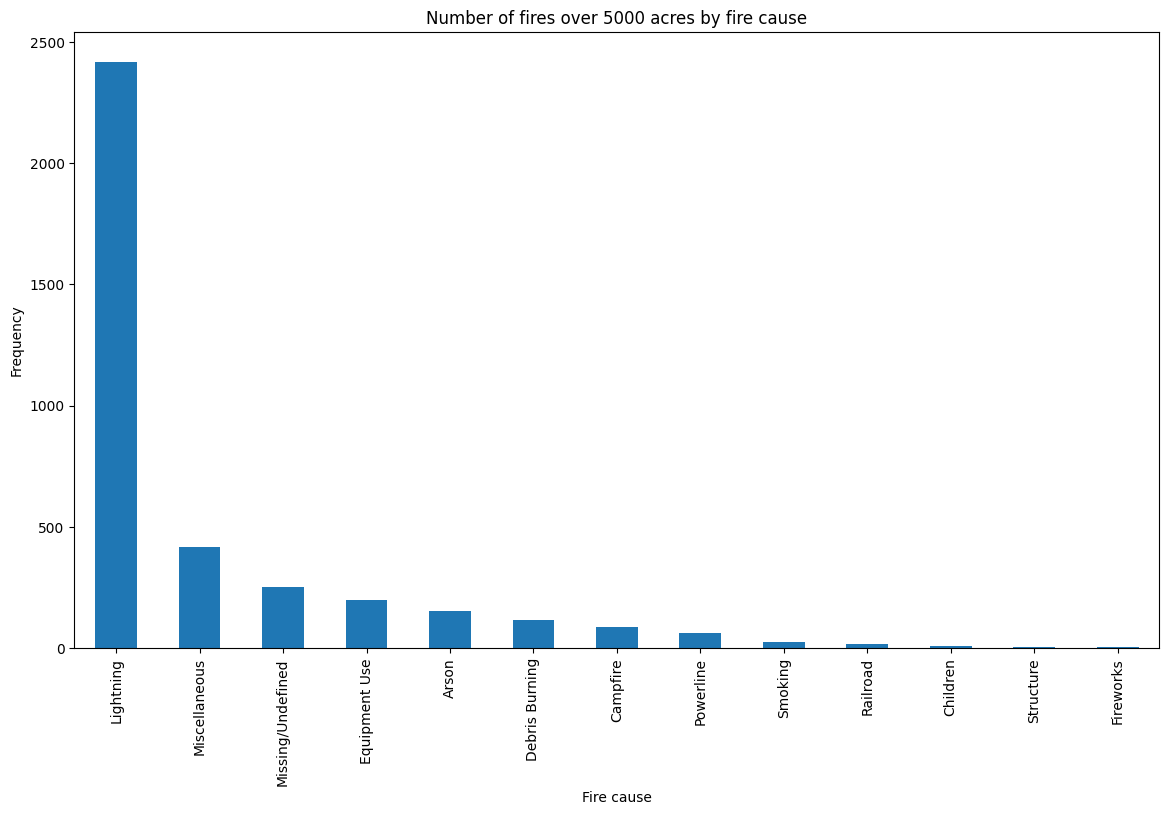

In [30]:
ax3.set_xlabel("Fire cause")
ax3.set_ylabel("Frequency")
ax4 = filtered_df_fires['STAT_CAUSE_DESCR'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of fires over 5000 acres by fire cause")
ax4.set_xlabel("Fire cause")
ax4.set_ylabel("Frequency")

fire_size_by_year = pd.DataFrame(fires.groupby(["FIRE_YEAR"]).FIRE_SIZE.sum().sort_values(ascending=False)).reset_index()

fire_size_by_year_sorted = fire_size_by_year.sort_values(by=["FIRE_YEAR"])


In [31]:
import plotly.express as px

fig = px.line(fire_size_by_year_sorted, x="FIRE_YEAR", y="FIRE_SIZE", title='Fire size by year', template = 'plotly_dark')
fig.show()


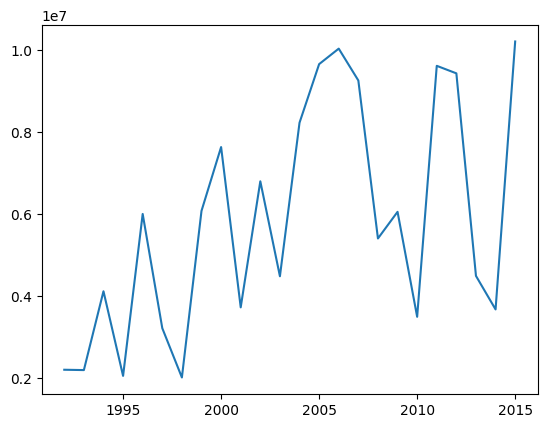

In [32]:

# Extract the date and close price columns
year = fire_size_by_year_sorted["FIRE_YEAR"]
size = fire_size_by_year_sorted["FIRE_SIZE"]

# Create a line plot
plt.plot(year, size)

# Show the plot
plt.show()




[Text(0.5, 1.0, 'Fire Size by Class')]

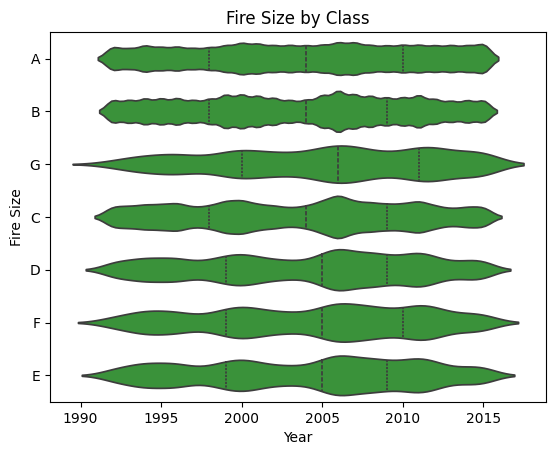

In [33]:
plt.scatter(year, size)
## fitting a linear regression line
m, b = np.polyfit(year, size, 1)
plt.ticklabel_format(style="plain")
plt.plot(year, m*year + b)
plt.scatter(year, size)

plt.title("Year vs. Sum of Fire Size")
plt.xlabel("Year")
plt.ylabel("Fire Size")
plt.ticklabel_format(style="plain")

started_by_lightning = (fires.query('STAT_CAUSE_DESCR=="Lightning"').groupby(['FIRE_YEAR']).FIRE_SIZE.sum() / fire_size_by_year_sorted.set_index('FIRE_YEAR').FIRE_SIZE)

started_by_lightning.name = 'started_by_lightning'
started_by_lightning = pd.DataFrame(started_by_lightning).reset_index()

###The most reported cause of wildfires was lightning
fig = px.line(started_by_lightning, x="FIRE_YEAR", y="started_by_lightning", title='Fraction of the total wildfire size started by lightning', template = 'plotly_dark')
fig.show()

started_by_miscellaneous_causes = (fires.query('STAT_CAUSE_DESCR=="Miscellaneous"').groupby(['FIRE_YEAR']).FIRE_SIZE.sum() / fire_size_by_year_sorted.set_index('FIRE_YEAR').FIRE_SIZE)



started_by_miscellaneous_causes.name = 'started_by_miscellaneous_causes'
started_by_miscellaneous_causes = pd.DataFrame(started_by_miscellaneous_causes).reset_index()

###The second most reported cause of wildfires was miscellaneous
fig = px.line(started_by_miscellaneous_causes, x="FIRE_YEAR", y="started_by_miscellaneous_causes", title='Fraction of the total wildfire size started by miscellaneous causes', template = 'plotly_dark')
fig.show()
violin_firesize = sns.violinplot(x='FIRE_YEAR', y='FIRE_SIZE_CLASS', data=fires, inner='quartile')
violin_firesize.set(title='Fire Size by Class')
#The violin chart of fire size by class confirms are are seeing more of all sizes of the wildfires

In [34]:
fires = fires[["OBJECTID",'SOURCE_SYSTEM_TYPE','SOURCE_SYSTEM',"FIRE_YEAR",'DISCOVERY_DATE',
               'DISCOVERY_DOY','DISCOVERY_TIME', 'STAT_CAUSE_DESCR','CONT_DATE',
               'CONT_DOY', 'CONT_TIME','FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE','LONGITUDE',
               'OWNER_CODE', 'OWNER_DESCR','STATE','COUNTY','FIPS_CODE', 'FIPS_NAME']]
fires

,OBJECTID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,...,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME
0,1,FED,FS-FIRESTAT,2005,2453404,33,1300,Miscellaneous,2453404,33,...,0,A,40,-121,5,USFS,CA,63,063,Plumas
1,2,FED,FS-FIRESTAT,2004,2453138,133,0845,Lightning,2453138,133,...,0,A,39,-120,5,USFS,CA,61,061,Placer
2,3,FED,FS-FIRESTAT,2004,2453156,152,1921,Debris Burning,2453156,152,...,0,A,39,-121,13,STATE OR PRIVATE,CA,17,017,El Dorado
3,4,FED,FS-FIRESTAT,2004,2453184,180,1600,Lightning,2453190,185,...,0,A,39,-120,5,USFS,CA,3,003,Alpine
4,5,FED,FS-FIRESTAT,2004,2453184,180,1600,Lightning,2453190,185,...,0,A,39,-120,5,USFS,CA,3,003,Alpine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880460,1880461,NONFED,ST-CACDF,2015,2457292,269,1726,Missing/Undefined,2457292,269,...,0,A,40,-122,13,STATE OR PRIVATE,CA,None,None,None
1880461,1880462,NONFED,ST-CACDF,2015,2457300,278,0126,Miscellaneous,NaN,NaN,...,0,A,38,-121,12,MUNICIPAL/LOCAL,CA,None,None,None
1880462,1880463,NONFED,ST-CACDF,2015,2457144,122,2052,Missing/Undefined,NaN,NaN,...,0,A,38,-121,12,MUNICIPAL/LOCAL,CA,None,None,None
1880463,1880464,NONFED,ST-CACDF,2015,2457310,287,2309,Missing/Undefined,NaN,NaN,...,2,B,38,-121,12,MUNICIPAL/LOCAL,CA,None,None,None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451897 entries, 0 to 451896
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   OBJECTID            451897 non-null  int64  
 1   SOURCE_SYSTEM_TYPE  451897 non-null  object 
 2   SOURCE_SYSTEM       451897 non-null  object 
 3   FIRE_YEAR           451897 non-null  int64  
 4   DISCOVERY_DATE      451897 non-null  float64
 5   DISCOVERY_DOY       451897 non-null  int64  
 6   DISCOVERY_TIME      451897 non-null  object 
 7   STAT_CAUSE_DESCR    451897 non-null  object 
 8   CONT_DATE           451897 non-null  float64
 9   CONT_DOY            451897 non-null  float64
 10  CONT_TIME           451897 non-null  object 
 11  FIRE_SIZE           451897 non-null  float64
 12  FIRE_SIZE_CLASS     451897 non-null  object 
 13  LATITUDE            451897 non-null  float64
 14  LONGITUDE           451897 non-null  float64
 15  OWNER_CODE          451897 non-nul

<Axes: >

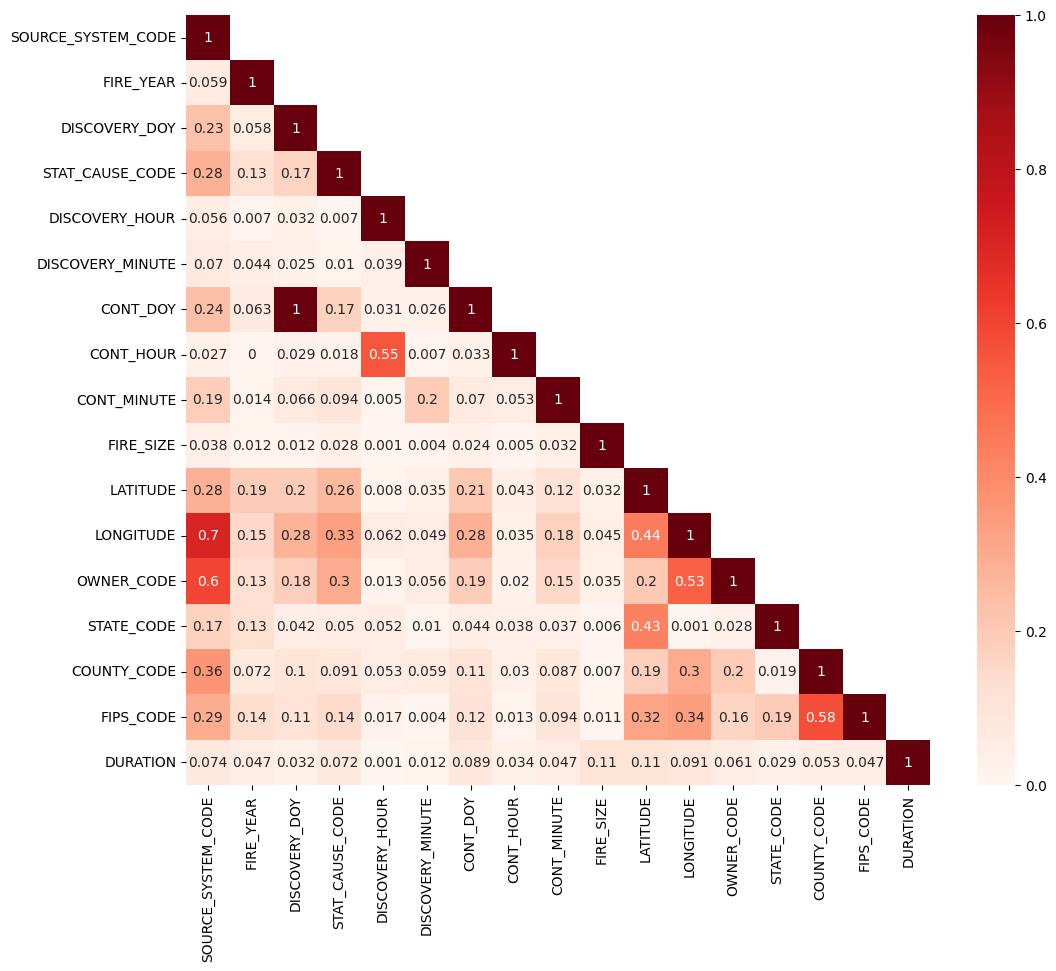

In [35]:
fires = fires[["OBJECTID",'SOURCE_SYSTEM_TYPE','SOURCE_SYSTEM',"FIRE_YEAR",'DISCOVERY_DATE',
               'DISCOVERY_DOY','DISCOVERY_TIME', 'STAT_CAUSE_DESCR','CONT_DATE',
               'CONT_DOY', 'CONT_TIME','FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE','LONGITUDE',
               'OWNER_CODE', 'OWNER_DESCR','STATE','COUNTY','FIPS_CODE', 'FIPS_NAME']]
fires



fires = fires.dropna()
fires


# remove missing/undefined causes and miscellaneous causes
fires = fires[fires["STAT_CAUSE_DESCR"]!="Missing/Undefined"]
fires = fires[fires["STAT_CAUSE_DESCR"]!="Miscellaneous"]
fires

# compute the discovery minutes and hours of the fires
fires["DISCOVERY_HOUR"]=fires["DISCOVERY_TIME"].astype("str").str[0:-2].astype(int)
fires["DISCOVERY_MINUTE"]=fires["DISCOVERY_TIME"].astype("str").str[-2:].astype(int)
fires


# compute the control hours and control minutes
fires["CONT_HOUR"]=fires["CONT_TIME"].astype("str").str[0:-2].astype(int)
fires["CONT_MINUTE"]=fires["CONT_TIME"].astype("str").str[-2:].astype(int)
fires

# compute the duration of the fires
fires["DURATION"] = 1440*(fires["CONT_DATE"]-fires["DISCOVERY_DATE"])+60*(fires["CONT_HOUR"] - fires["DISCOVERY_HOUR"])+(fires["CONT_MINUTE"] - fires["DISCOVERY_MINUTE"])
fires

# encode state
# assign the number from 0 - 50 to different state
tmp=fires.groupby(["STATE"]).sum()
tmp["STATE_CODE"]=np.arange(0,50)

tmp1=tmp["STATE_CODE"]
tmp1=tmp1.reset_index()

fires=pd.merge(fires,tmp1,how="left",on=["STATE"])
fires


# encode county
# assign the number from 0 - 2403 to different counties
tmp=fires.groupby(["COUNTY"]).sum()
tmp["COUNTY_CODE"]=np.arange(0,2404)

tmp1=tmp["COUNTY_CODE"]
tmp1=tmp1.reset_index()

fires=pd.merge(fires,tmp1,how="left",on=["COUNTY"])
fires

# encode source system
# assign the number from 0 - 15 to different source systems
tmp=fires.groupby(["SOURCE_SYSTEM"]).sum()
tmp["SOURCE_SYSTEM_CODE"]=np.arange(0,16)

tmp1=tmp["SOURCE_SYSTEM_CODE"]
tmp1=tmp1.reset_index()

fires=pd.merge(fires,tmp1,how="left",on=["SOURCE_SYSTEM"])
fires


# re-encode stat_cause_code
# assign the number from 0 - 10 to different wildfire causes
tmp=fires.groupby(["STAT_CAUSE_DESCR"]).sum()
tmp["STAT_CAUSE_CODE"]=np.arange(0,11)

tmp1=tmp["STAT_CAUSE_CODE"]
tmp1=tmp1.reset_index()

fires=pd.merge(fires,tmp1,how="left",on=["STAT_CAUSE_DESCR"])
fires


# convert string to numerical values
fires["FIPS_CODE"] = fires["FIPS_CODE"].astype(int)

# show the types of the data
fires.info()


# compute the pairwise correlation matrix
correlation = fires[["SOURCE_SYSTEM_CODE","FIRE_YEAR",'DISCOVERY_DOY','STAT_CAUSE_CODE', "DISCOVERY_HOUR",
               "DISCOVERY_MINUTE",'CONT_DOY', "CONT_HOUR","CONT_MINUTE",'FIRE_SIZE', 'LATITUDE','LONGITUDE',
               'OWNER_CODE', 'STATE_CODE',"COUNTY_CODE",'FIPS_CODE',"DURATION"]].corr().round(3)
correlation


# print heatmap of the correlation matrix
# next two lines remove the duplicate upper half of matrix
plt.figure(figsize=(12,10))
mask = np.zeros(correlation.shape, dtype=bool)
mask[np.triu_indices(len(mask),1)] = True

sns.heatmap(data=correlation.abs(), annot=True, cmap=plt.cm.Reds, mask = mask)




In [36]:
# define X (features) and y (target) values
X = fires[["SOURCE_SYSTEM_CODE","FIRE_YEAR",'DISCOVERY_DOY',"DISCOVERY_HOUR","DISCOVERY_MINUTE",
               'CONT_DOY', "CONT_HOUR","CONT_MINUTE",'FIRE_SIZE', 'LATITUDE','LONGITUDE',
               'OWNER_CODE', 'STATE_CODE',"COUNTY_CODE",'FIPS_CODE',"DURATION"]]
y = fires["STAT_CAUSE_CODE"]
X

# split the training dataset and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# establish a XGBoost classifier with hyperparameters set
xg_class = xgb.XGBClassifier(learning_rate=0.1,n_estimators=500,max_depth=7,gamma=0.05,subsample=0.8,
                         colsample_bytree=0.8,objective= 'binary:logistic',seed=27)
xg = xg_class.fit(X_train,y_train)


# obtain the prediction results
preds = xg.predict(X_test)



Train Score: 0.744012
Test Score: 0.670259
Precision: 0.651117
Recall: 0.670259
F1 Score: 0.646579


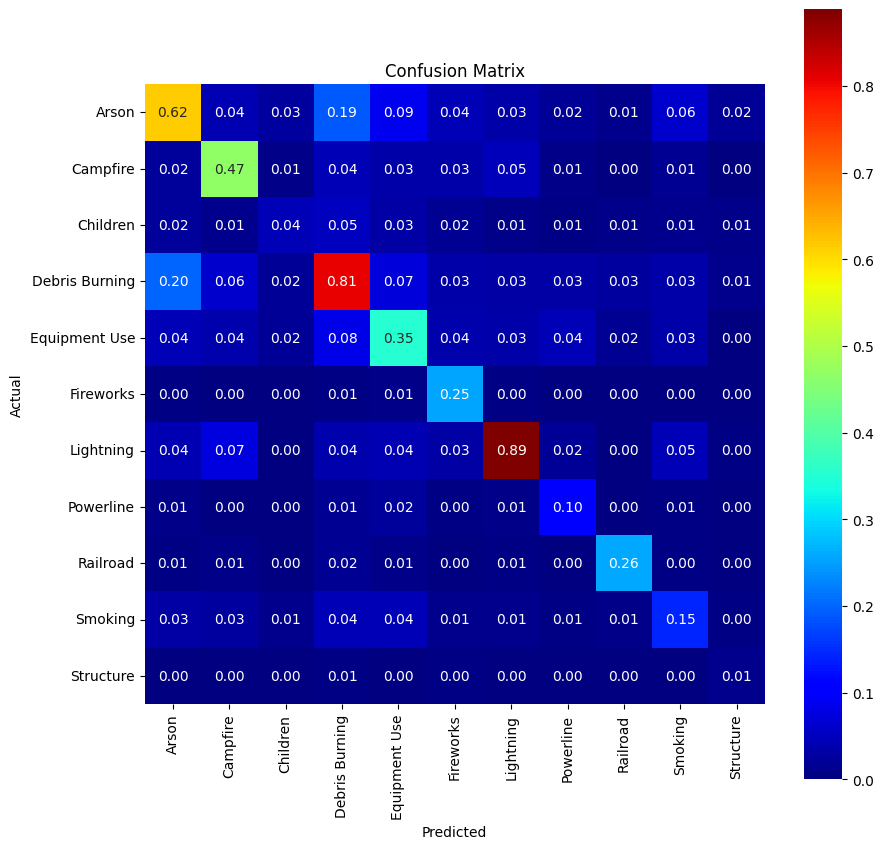

In [37]:


# compute the metrics for model performance,
# i.e. training accuracy, test accuracy, precision, recall, F1 score
print("Train Score: %f" % xg.score(X_train,y_train))
print("Test Score: %f" % xg.score(X_test,y_test))
print("Precision: %f" % precision_score(y_test, preds, average="weighted"))
print("Recall: %f" % recall_score(y_test, preds, average="weighted"))
print("F1 Score: %f" % f1_score(y_test, preds, average="weighted"))



# plot the confusion matrix
from sklearn.metrics import confusion_matrix
labels=["Arson","Campfire","Children","Debris Burning","Equipment Use","Fireworks","Lightning","Powerline","Railroad","Smoking","Structure"]
fig, ax = plt.subplots(figsize=(10,10))
conf_matrix = confusion_matrix(y_test, preds)
conf_matrix = conf_matrix/np.sum(conf_matrix, axis=1)
sns.heatmap(conf_matrix, annot=True, fmt=".2f", square=True, cbar=True,
                cmap=plt.cm.jet,xticklabels=labels, yticklabels=labels,ax=ax)
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
ax.set_title('Confusion Matrix')
plt.show()